# Block decompositions

`CC-BY 2025 P.A. Brooksbank, M.D. Kassabov, J.B. Wilson`

We explore the Dleto project for block decompositions.  First we load the necessary components. 


## Step 0: Installing necessary packages

This program is written in Julia and so first we need to load Julia and IJulia if that is not already part of your system.  This my involve upgrading your Python tools and restarting your Jupyter notebook, VS code or your favorite notebook shell.  While in principle this is compatible with Julia 1.7, we have successfully tested it with later versions as well.

### Step 0.1: Installing Julia Lab

Run the following cell.  A successful run will report something like
```
Julia kernel is active!
Julia version: 1.10.3
```
If an error occurs, uncomment the first 5 lines and rerun the cell.  This may require you to restart your notebook.  If this does not fix it, consider putting the error message into an LLM to get supporting installation instructions relevant to your setting.

In [1]:
## Uncomment if you do not have iJulia installed
# using Pkg
# Pkg.add("IJulia")
# This installs Julia's Jupyter kernel without Python dependencies
# println("IJulia installed! Restart VS Code and select Julia kernel.")

# Ensure Julia kernel is properly recognized  
# This notebook requires Julia kernel for execution and export
using IJulia
println("Julia kernel is active!")
println("Julia version: ", VERSION) # Fix Jupyter/Julia setup - Install IJulia for Julia notebooks


Julia kernel is active!
Julia version: 1.10.3


### 0.2 Installing Dleto

To load `OpenDelto` run the next cell.  This assumes that you have cloned the full [Git Repository](https://github.com/thetensor-space/OpenDleto) and that you have launched this notebook from the subfolder `./examples/`

In [22]:
include("../Dleto.jl") 


plotTensor (generic function with 2 methods)

## 1 Tucker decompositions

When given a matrix a key step is to calculate a coordinate change which exposes the most number of all zero columns, rows, or both.  We can think of this in theoretical language (kernels and cokernels) or in computational  ways (left/right null space).  These same concept has been developed for tensors with explorations extending to the 1800's under the name of "radicals" and the later work of Tucker.  Today the term "Tucker decomposition" has become one of the dominate names for this process.

### 1.1 Creating a tensor with a Tucker decomposition

Just as a tall-skinny matrix will have nontrivial left null spaces, and short-wide matrix will have a nontrivial right null space, we can use shape of a tensor to predict some of the sources of radicals, i.e. non-trivial Tucker decomposition.  A tensor of shape $d_1\times d_2\times d_3$ has a nontrivial Tucker decomposition if $d_i d_j < d_k$, in some permutation of $\{i,j,k\}=\{1,2,3\}$. 

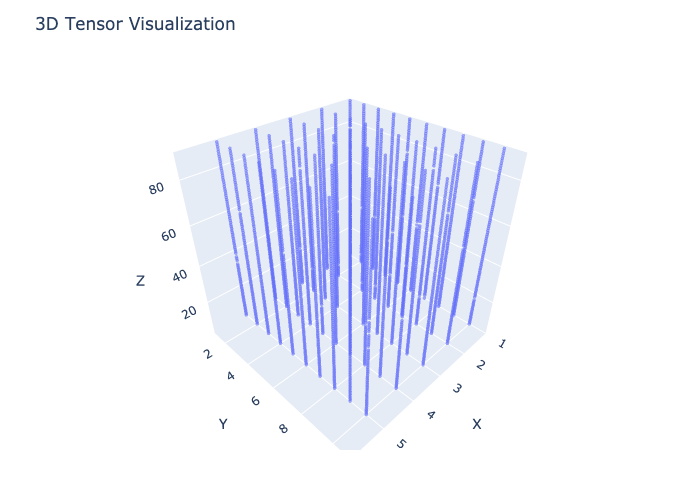

In [20]:
T = rand(5, 10, 90);

# PlotlyJS is now installed!
using PlotlyJS

plotTensor(T)

### 1.2 Applying Tucker sensitive chisel

Let us now apply Dleto with a chisel designed for detecting 

In [24]:
T_tuck = TuckerDecomposition(T)


	Building linear system...
	Sizes: (8225, 13500)
  0.225408 seconds (104.48 k allocations: 865.072 MiB, 26.45% compilation time)
	Calculuating SVD of matrix of dimensions: (8225, 13500)
 84.577402 seconds (50.77 k allocations: 2.528 GiB, 0.25% gc time)


(tensor = [3.289895851636413e-14 -1.877296096723356e-14 … -2.097461656653432e-15 3.7557278007143625e-14; -2.3352718638069546e-14 -3.9326374098897413e-16 … -7.071829918674226e-14 1.099889990590483e-15; … ; -6.499469582674371e-14 2.625948795900542e-14 … -4.2871589295469596e-14 5.687879232236742e-14; 1.783082420496117e-14 4.741370879349919e-15 … -4.494421151229103e-14 -6.456938379914323e-14;;; 6.741215328554384e-14 -7.900359006880956e-15 … 4.1963740158023797e-14 1.6663947851941982e-14; 3.8139712788689966e-14 -2.2467775999027247e-14 … 4.067228196006647e-14 -1.4230694863041842e-14; … ; 1.510707664767782e-14 8.304384149626062e-15 … 4.807240797166567e-15 9.357381038024003e-15; -7.678087241343344e-14 -4.5932162834921227e-14 … 4.40549477717065e-14 -1.7338438484122747e-14;;; -5.137696459724894e-14 2.808511875689049e-15 … 6.651444841777584e-14 3.8897528359552805e-14; -2.087672323548575e-14 -4.9660619405052415e-15 … -6.824264742279157e-15 -4.8252221625958134e-15; … ; 2.416397023215374e-14 5.782385

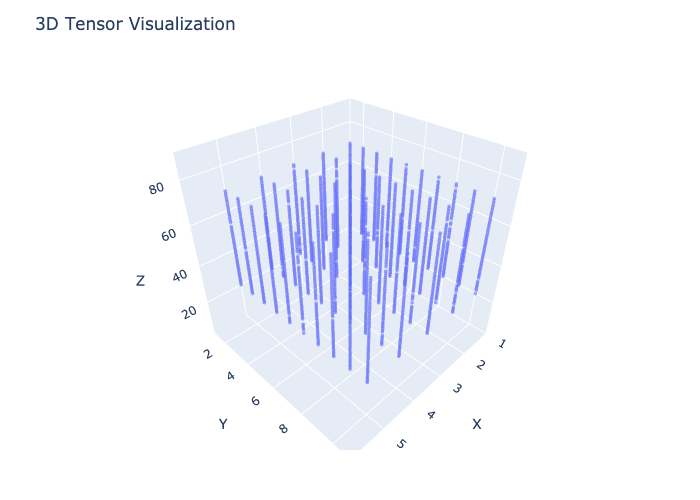

In [25]:
plotTensor(T_tuck.tensor)